Reading /Users/jakubblaha/Documents/thesis/thesis-python/notebooks/../data/fif/S01-epo.fif ...
    Found the data of interest:
        t =       0.00 ...   14992.19 ms
        0 CTF compensation matrices available
Adding metadata with 3 columns
12 matching events found
No baseline correction applied
0 projection items activated
Creating RawArray with float64 data, n_channels=14, n_times=23040
    Range : 0 ... 23039 =      0.000 ...   179.992 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 423 

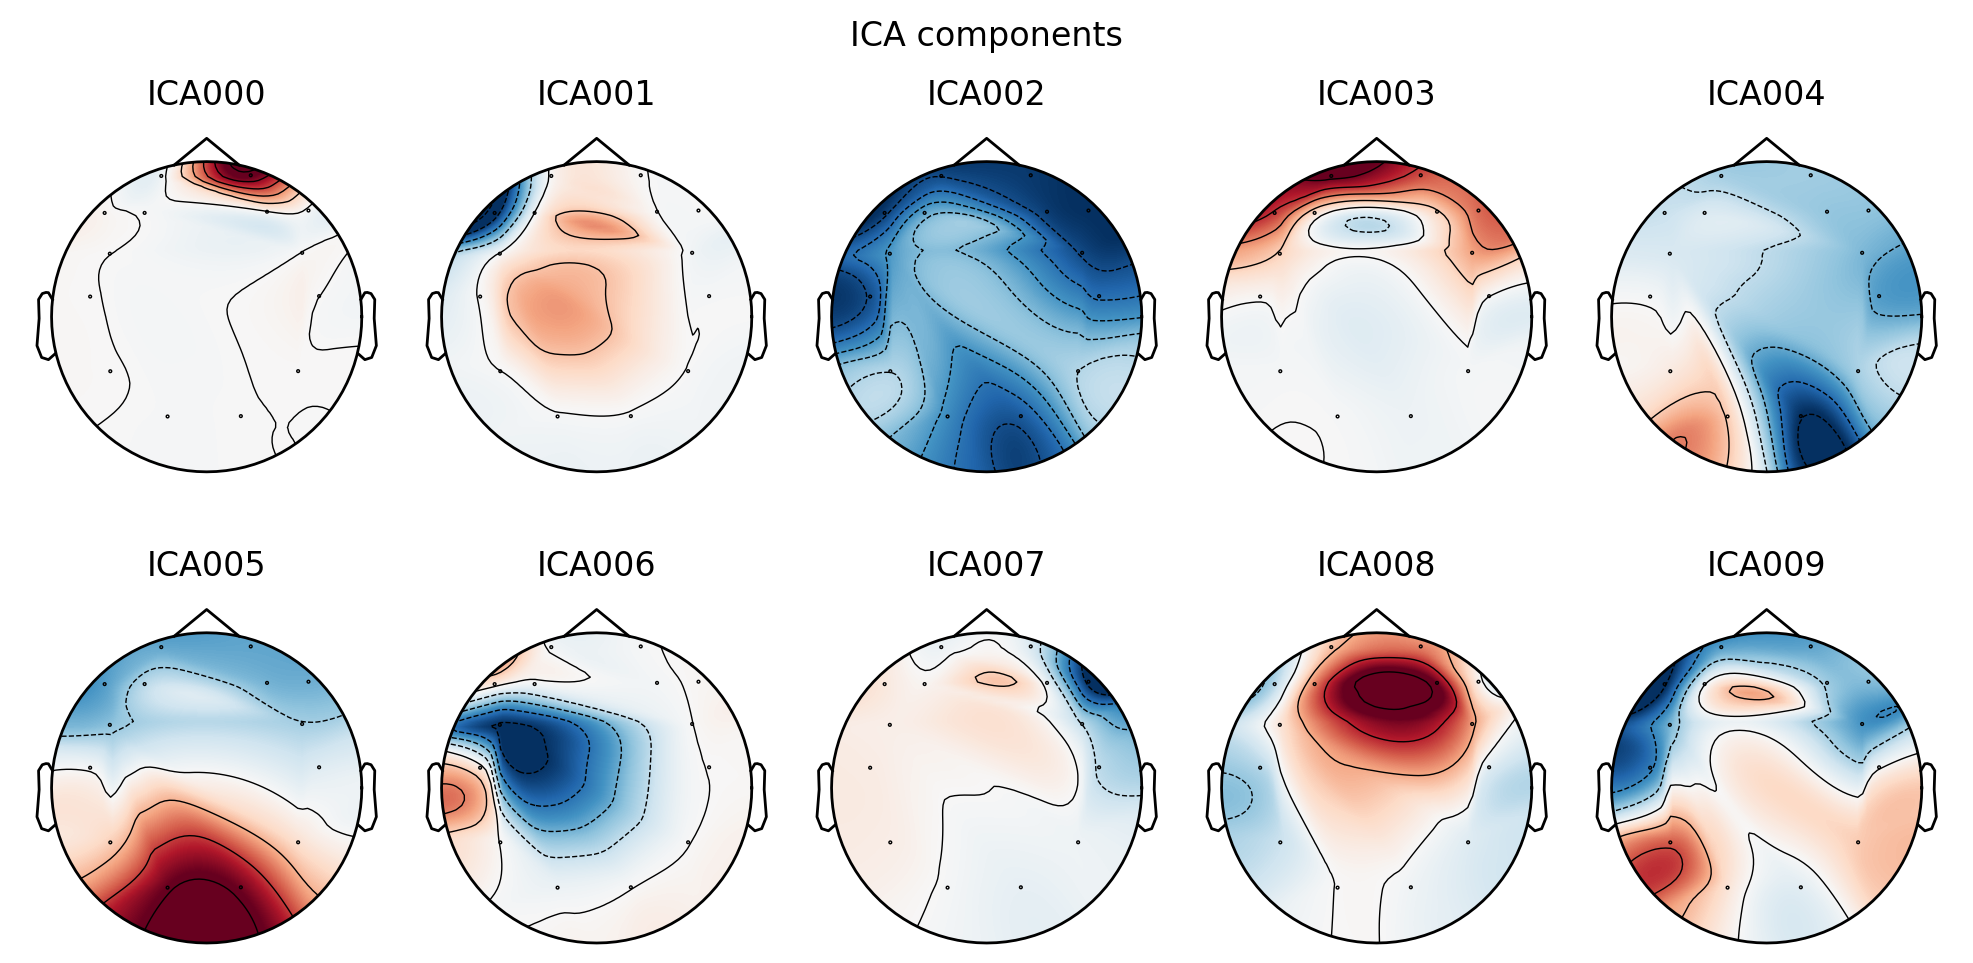

In [1]:
%matplotlib qt

import mne
import numpy as np
from mne.preprocessing import ICA

SUBJECT = 1

fname = f"S{str(SUBJECT).zfill(2)}-epo.fif"
eeg = mne.read_epochs("../data/fif/" + fname)
# eeg.plot(scalings="200")

data = eeg.get_data()
data = np.concatenate(data, axis=1)
# data = np.expand_dims(data, 0)

data.shape

raw = mne.io.RawArray(data, eeg.info)
filt_raw = raw.copy().filter(l_freq=1.0, h_freq=30)

ica = ICA(n_components=10, max_iter="auto", random_state=97)
ica.fit(filt_raw)
# ica

# explained_var_ratio = ica.get_explained_variance_ratio(filt_raw, ch_type="eeg")
# for channel_type, ratio in explained_var_ratio.items():
#     print(f"Fraction of {channel_type} variance explained by all components: {ratio}")

# eog_evoked = mne.preprocessing.create_eog_epochs(eeg).average()

raw.load_data()
ica.plot_sources(raw, show_scrollbars=False)
ica.plot_components()

In [2]:
ica.exclude = [1]  # indices chosen based on various plots above

reconst_raw = raw.copy()
ica.apply(reconst_raw)

# raw.plot(show_scrollbars=False, scalings="50")
# reconst_raw.plot(show_scrollbars=False, scalings="50")

reconst_raw.save("../data/fif/ica_" + fname, overwrite=True)

Applying ICA to Raw instance
    Transforming to ICA space (10 components)
    Zeroing out 1 ICA component
    Projecting back using 14 PCA components
Writing /Users/jakubblaha/Documents/thesis/thesis-python/notebooks/../data/fif/ica_S01-epo.fif
Closing /Users/jakubblaha/Documents/thesis/thesis-python/notebooks/../data/fif/ica_S01-epo.fif
[done]


/var/folders/wg/8xzwtj0n6fd93r4pqlr_bv1c0000gn/T/ipykernel_33519/4167172788.py:9: RuntimeWarning: This filename (/Users/jakubblaha/Documents/thesis/thesis-python/notebooks/../data/fif/ica_S01-epo.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  reconst_raw.save("../data/fif/ica_" + fname, overwrite=True)


2024-10-24 14:37:11.631 python[33519:2442407] +[IMKClient subclass]: chose IMKClient_Legacy
2024-10-24 14:37:11.631 python[33519:2442407] +[IMKInputSession subclass]: chose IMKInputSession_Legacy


: 